# How to Visualize a Decision Tree from a Random Forest in Python using Scikit-Learn

* source: https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

### Create a model train and extract

we could use a single decision tree, but since I often employ the random forest for modeling it’s used in this example. (The trees will be slightly different from one another!).

In [1]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

In [4]:
# Train
model.fit(iris.data, iris.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [5]:
# Extract single tree
estimator = model.estimators_[5]

In [7]:
len(model.estimators_)

10

### Export Tree as .dot File

This makes use of the export_graphviz function in Scikit-Learn. There are many parameters here that control the look and information displayed. Take a look at the documentation for specifics.

In [9]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

### Convert dot to png using a system command

running system commands in Python can be handy for carrying out simple tasks. This requires installation of graphviz which includes the dot utility. For the complete options for conversion, take a look at the documentation.

In [10]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

### Visualize

the best visualizations appear in the Jupyter Notebook. (Equivalently you can use matplotlib to show images).

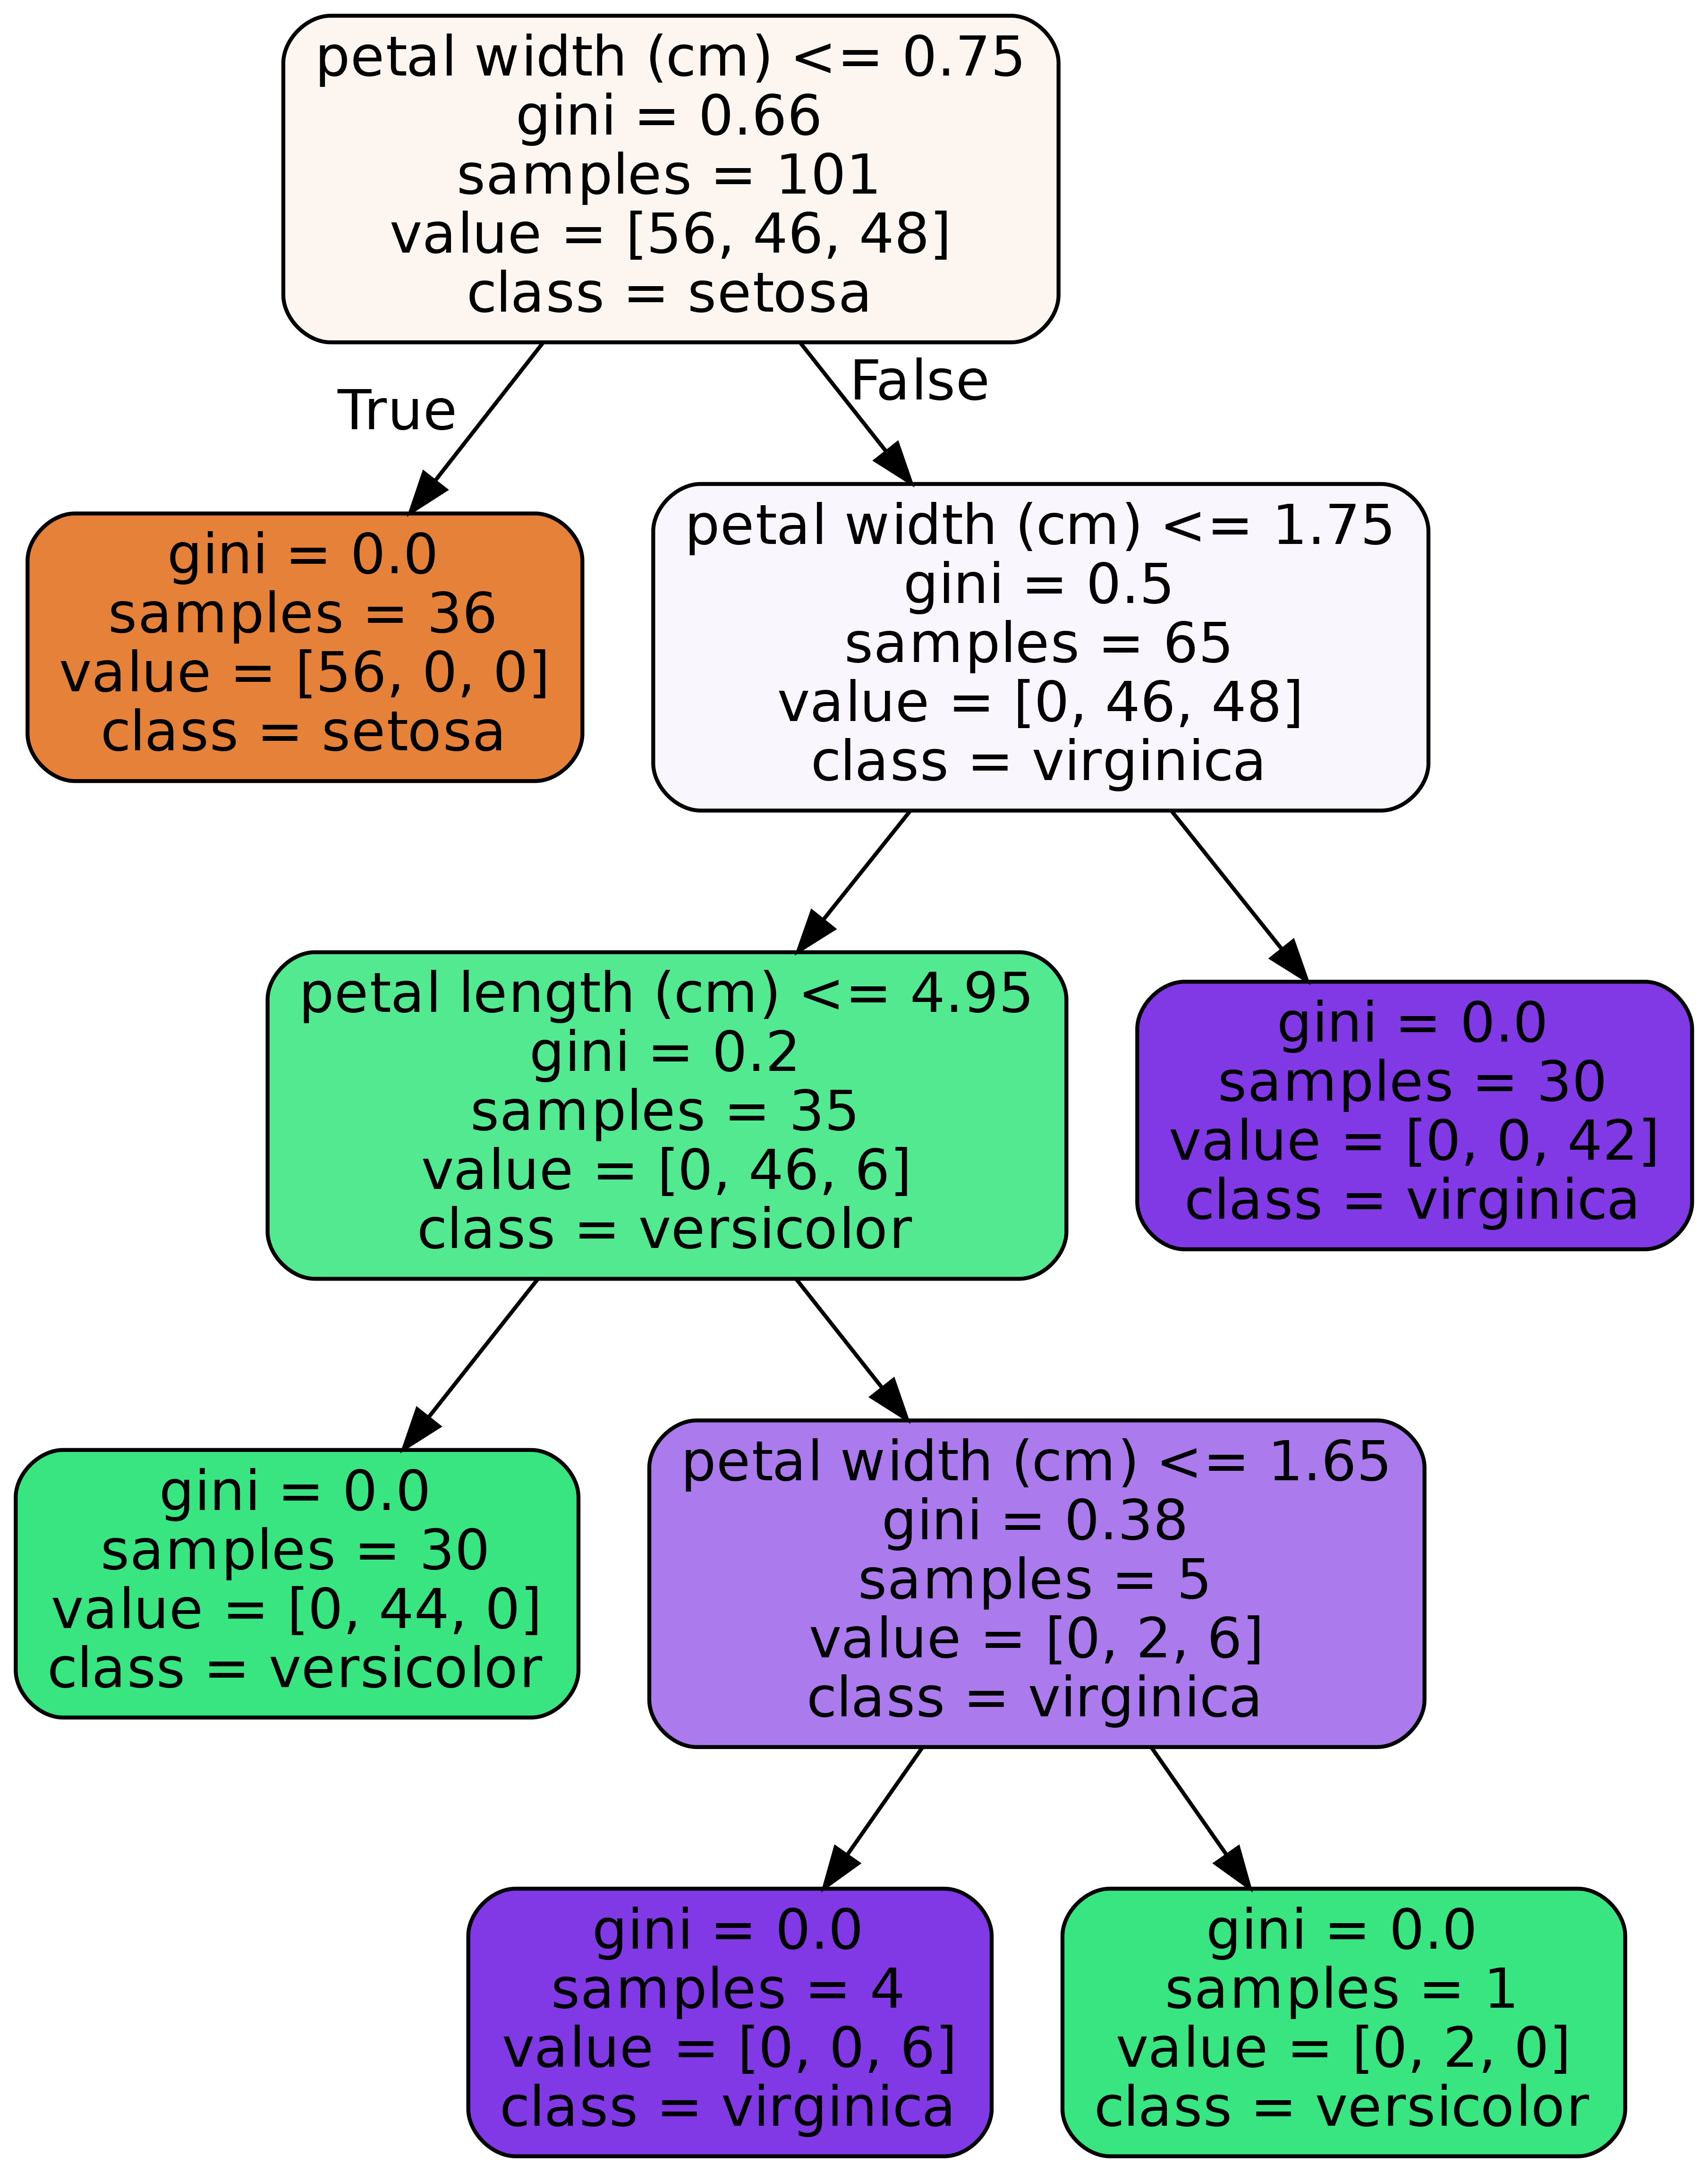

In [11]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')